# 1. Importing Data and Variable Description

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir('D:\\Data')
df_train=pd.read_csv('train.csv', delimiter=',')
df_test=pd.read_csv('test.csv', delimiter=',')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
'''Dimensions of train and test data'''
print('Dimensions of train data:', df_train.shape)
print('Dimensions of test data:', df_test.shape)

Dimensions of train data: (1460, 81)
Dimensions of test data: (1459, 80)


- We don't have SalePrice variable for test variable, so we have to infer SalePrice for test set by learning from train set.
- SalePrice is our target variable.
- Rest of the variables are our predictor variables.


In [5]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


- That means that we have 38 and 37 columns with float64 or int64 variables


C:\Users\Администратор\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(10.0, 14.0, 0.0, 180.0)

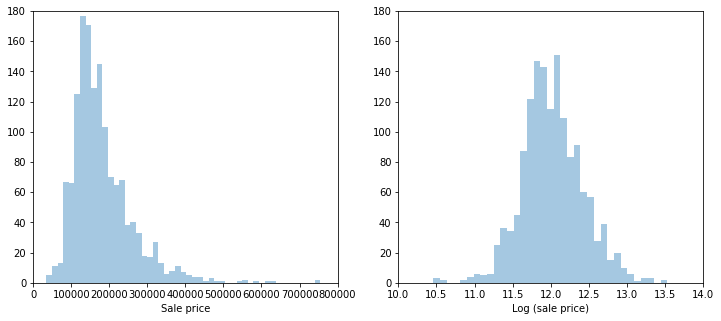

In [7]:
#histogram of SalePrice
# Set up the matplotlib figure
plt.figure(figsize=(12,5))

plt.subplot(121)
sns.distplot(df_train['SalePrice'],kde=False)
plt.xlabel('Sale price')
plt.axis([0,800000,0,180])

plt.subplot(122)
sns.distplot(np.log(df_train['SalePrice']),kde=False)
plt.xlabel('Log (sale price)')
plt.axis([10,14,0,180])

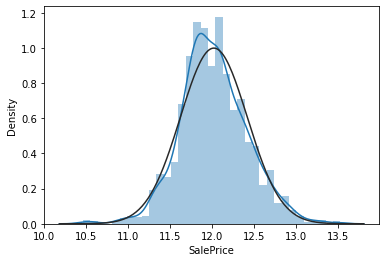

In [8]:
from scipy.stats import norm, skew

#Check the new distribution 
sns.distplot(np.log(df_train['SalePrice']) , fit=norm);


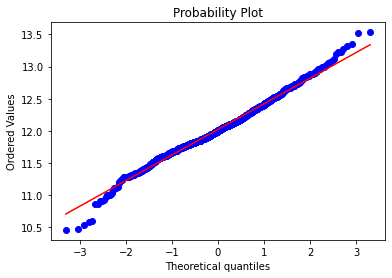

In [10]:
#Probability Plot
from scipy import stats

fig = plt.figure()
res = stats.probplot(np.log(df_train['SalePrice']), plot=plt)
plt.show()

# 2. Data Manipulation and Correlation

<AxesSubplot:>

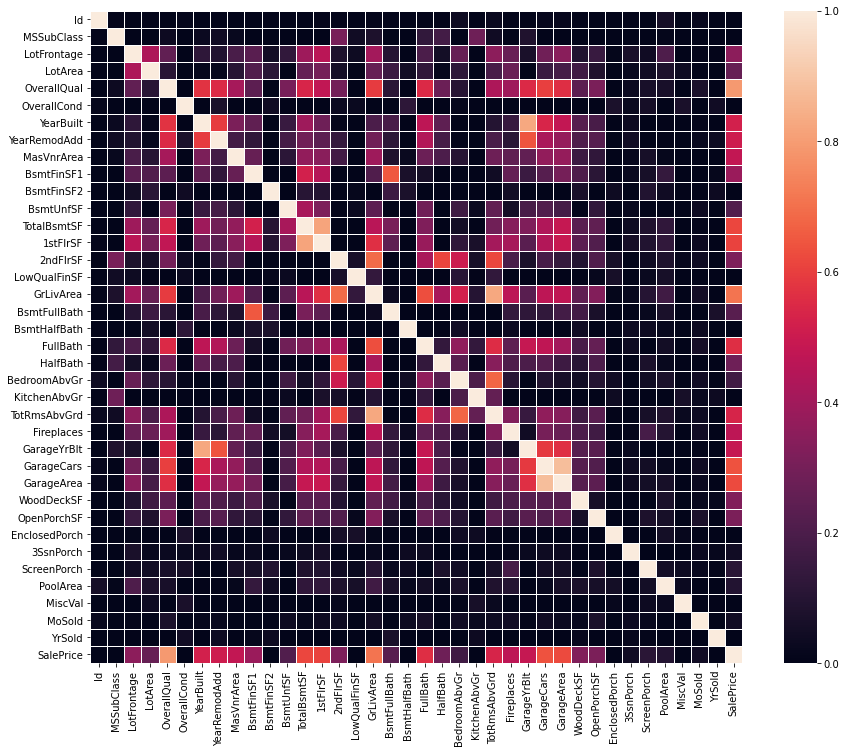

In [11]:
corr = df_train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1, square=True)

In [12]:
corr_list = corr['SalePrice'].sort_values(axis=0,ascending=False ).iloc[1:]
corr_list

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [13]:
#find missing data
missing = df_train.isnull().sum().sort_values(ascending=False)
percent_of_missing = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending=False)
list_missing = pd.concat([missing, percent_of_missing,corr_list], axis=1, keys=['Amount', 'In percents','Corr'])
list_missing.head(22)

,Amount,In percents,Corr
PoolQC,1453,99.520548,NaN
MiscFeature,1406,96.301370,NaN
Alley,1369,93.767123,NaN
Fence,1179,80.753425,NaN
FireplaceQu,690,47.260274,NaN
LotFrontage,259,17.739726,0.351799
GarageYrBlt,81,5.547945,0.486362
GarageCond,81,5.547945,NaN
GarageType,81,5.547945,NaN
GarageFinish,81,5.547945,NaN


- 'PoolQC','MiscFeature','Alley','Fence', 'FireplaceQu' have >= 50% of missing date, that is why we could delete these variables and do not try to fill the missing data. None of them are main or important things when looking for house to buy. 
- 'LotFrontage' and 'GarageCond' do not have strong correlation with 'SalePrice', so it is also possible to remove these columns.
- 'GarageCars' is the main thing among 'Garage...', so 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual' can be deleted without removing unique information.
- The same thing we have with 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1'.
- According to missing values in 'MasVnrType', these values have to be missed also in 'MasVnrArea'. So lets drop 'MasVnrType' and drop rows with missing data in 'MasVnrArea'.
- As 'Electrician' is a necessary indicator, so we will also drop row with missing values in this column. 
- As conclusion, to take away missing data, we will drop all columns with NA, except 'MasVnrArea' and 'Electrical'. In this two columns we will exclude rows with NA.

In [14]:
# drop missing values
df_train=df_train.drop((list_missing[list_missing['Amount'] > 35]).index,1)
df_train=df_train.drop(['MasVnrType'], axis=1)
df_train=df_train.drop(df_train.loc[df_train['MasVnrArea'].isnull()].index)
df_train=df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

df_train.isna().sum().sort_values(ascending=False)
#So we don`t have missing values in train data anymore

Id            0
MSSubClass    0
Electrical    0
1stFlrSF      0
2ndFlrSF      0
             ..
Foundation    0
BsmtFinSF1    0
BsmtFinSF2    0
BsmtUnfSF     0
SalePrice     0
Length: 64, dtype: int64

- Let`s deal with categorical variables and change in numerical indicator

In [15]:
missing_test = df_test.isnull().sum().sort_values(ascending=False)
t_missing = pd.concat([missing_test, missing], axis=1, keys=['Test', 'Train'])
t_missing.head(35)

,Test,Train
PoolQC,1456.0,1453
MiscFeature,1408.0,1406
Alley,1352.0,1369
Fence,1169.0,1179
FireplaceQu,730.0,690
LotFrontage,227.0,259
GarageYrBlt,78.0,81
GarageQual,78.0,81
GarageFinish,78.0,81
GarageCond,78.0,81


In [16]:
# drop missing values in test data
df_test=df_test.drop((t_missing[t_missing['Test'] > 35]).index,1)
df_test=df_test.drop(['MasVnrType'], axis=1)

df_test['MSZoning'] = df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])
df_test['Utilities'] = df_test['Utilities'].fillna(df_test['Utilities'].mode()[0])
df_test['Functional'] = df_test['Functional'].fillna(df_test['Functional'].mode()[0])
df_test['KitchenQual'] = df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0])
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])
df_test['Exterior1st'] = df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])
df_test['SaleType'] = df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mode()[0])
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mode()[0])
df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mode()[0])
df_test['BsmtUnfSF'] = df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].mean())
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean())
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].mode()[0])
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].mode()[0])
df_test['GarageCars'] = df_test['GarageCars'].fillna(df_test['GarageCars'].mode()[0])
df_test['GarageArea'] = df_test['GarageArea'].fillna(df_test['GarageArea'].mean())
df_test.isna().sum().sort_values(ascending=False)

Id               0
Functional       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
                ..
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
SaleCondition    0
Length: 63, dtype: int64

In [17]:
categorical = df_train[df_train.select_dtypes(include = ["object"]).columns]
categorical = pd.get_dummies(categorical)
categorical.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [18]:
numerical=df_train[df_train.select_dtypes(exclude = ["object"]).columns]
numerical.shape

(1451, 36)

In [19]:
t_categorical = df_test[df_test.select_dtypes(include = ["object"]).columns]
t_categorical = pd.get_dummies(t_categorical)

t_numerical=df_test[df_test.select_dtypes(exclude = ["object"]).columns]

categorical = categorical[categorical.columns.intersection(t_categorical.columns.values)]

df_test = pd.concat([t_categorical,t_numerical],axis=1)
df_test.shape

(1459, 207)

# 3. Modeling

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [21]:
df_train = pd.concat([categorical,numerical],axis=1)
df_train.shape

(1451, 208)

In [22]:
# Separate target from predictors
y = df_train['SalePrice']
X = df_train.drop(["SalePrice","Id"], axis=1)

In [24]:
# Split the data to train the model
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

### Decision Tree Regressor


In [25]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)
clf_tr = clf.predict(X_train)

print ('Mean Squared Error:','%.2f'%mean_squared_error(y_test, clf_predict, squared=False))

Mean Squared Error: 38036.16


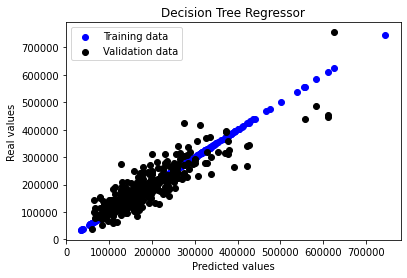

In [26]:
# Plot predictions - Real values
plt.scatter(clf_tr, y_train, c = "blue",  label = "Training data")
plt.scatter(clf_predict, y_test, c = "black",  label = "Validation data")
plt.title("Decision Tree Regressor")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.show()

### Random Forest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)
rfc_tr = rfc.predict(X_train)


print ('Mean Squared Error:','%.2f'%mean_squared_error(y_test, rfc_predict, squared=False))

Mean Squared Error: 23395.28


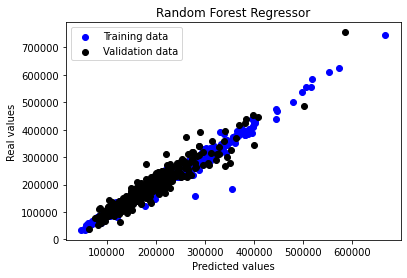

In [28]:
# Plot predictions - Real values
plt.scatter(rfc_tr, y_train, c = "blue",  label = "Training data")
plt.scatter(rfc_predict, y_test, c = "black",  label = "Validation data")
plt.title("Random Forest Regressor")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.show()

###  MLP Regressor (Neural Networks)

In [29]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(X_train, y_train)
mlp_predict = mlp.predict(X_test)
mlp_tr = mlp.predict(X_train)


print ('Mean Squared Error:','%.2f'%mean_squared_error(y_test, mlp_predict, squared=False))

Mean Squared Error: 44640.49


C:\Users\Администратор\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


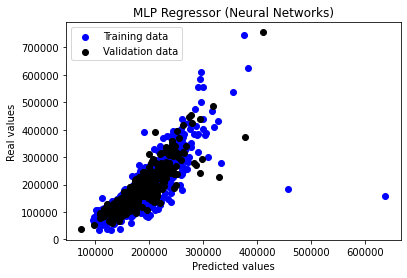

In [30]:
# Plot predictions - Real values
plt.scatter(mlp_tr, y_train, c = "blue",  label = "Training data")
plt.scatter(mlp_predict, y_test, c = "black",  label = "Validation data")
plt.title("MLP Regressor (Neural Networks)")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.show()

###  Support Vector Regressor

In [31]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
svr_predict = svr.predict(X_test)
svr_tr = svr.predict(X_train)


print ('Mean Squared Error:','%.2f'%mean_squared_error(y_test, svr_predict, squared=False))

Mean Squared Error: 77500.74


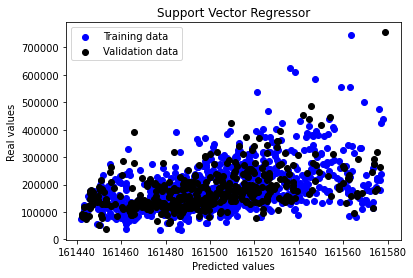

In [32]:
# Plot predictions - Real values
plt.scatter(svr_tr, y_train, c = "blue",  label = "Training data")
plt.scatter(svr_predict, y_test, c = "black",  label = "Validation data")
plt.title("Support Vector Regressor")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.show()

### Gradient Boosting Regressor

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
search_random = {'n_estimators': range(1000, 5000, 100), 'learning_rate':[0.01, 0.1, 0.05]}
abc = GradientBoostingRegressor()
abc.fit(X_train, y_train)
abc_predict = abc.predict(X_test)
abc_tr = abc.predict(X_train)


print ('Mean Squared Error:','%.2f'%mean_squared_error(y_test, abc_predict, squared=False))

Mean Squared Error: 22259.65


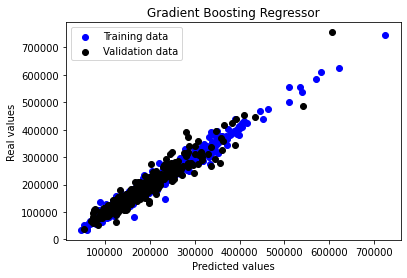

In [34]:
# Plot predictions - Real values
plt.scatter(abc_tr, y_train, c = "blue",  label = "Training data")
plt.scatter(abc_predict, y_test, c = "black",  label = "Validation data")
plt.title("Gradient Boosting Regressor")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.show()

So the best and the lowest result of RMSE we have in Gradient Boosting Regressor. Let`s use this model to make prediction for test data. 

In [35]:
result=pd.DataFrame()
result['Id']=df_test['Id']
test_pred = abc.predict(df_test.drop(["Id"], axis=1))
result['SalePrice']=test_pred

In [36]:
result.head()

,Id,SalePrice
0,1461,115410.362738
1,1462,155283.957703
2,1463,170460.332011
3,1464,182761.674674
4,1465,199553.210304


In [37]:
result.to_csv("Result_SalePrice.csv", index = False)